# House Prices - Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
<br/> <br/>
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### _1. Problem Definition_
There is a Kaggle competition whose purpose of the challenge is to predict the price of houses. For each Id in the test set, you must predict the value of the SalePrice variable.
<br>
#### Metrics
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
##### Submission File Format
The file should contain a header and have the following format:
<blockquote>
Id,SalePrice<br/>
1461,169000.1<br/>
1462,187724.1233<br/>
1463,175221<br/>
etc.<br/>
</blockquote>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('data/train.csv', sep=',')
df_test = pd.read_csv('data/test.csv', sep=',')

In [7]:
display(df_train.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
list_columns = df_train.columns

In [46]:
list_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
for column in list_columns:
    _len = df_train[column].isnull().sum()
    if _len > 0:
        print('Column: {}, Lenght {}'.format(column, _len))

Column: LotFrontage, Lenght 259
Column: Alley, Lenght 1369
Column: MasVnrType, Lenght 8
Column: MasVnrArea, Lenght 8
Column: BsmtQual, Lenght 37
Column: BsmtCond, Lenght 37
Column: BsmtExposure, Lenght 38
Column: BsmtFinType1, Lenght 37
Column: BsmtFinType2, Lenght 38
Column: Electrical, Lenght 1
Column: FireplaceQu, Lenght 690
Column: GarageType, Lenght 81
Column: GarageYrBlt, Lenght 81
Column: GarageFinish, Lenght 81
Column: GarageQual, Lenght 81
Column: GarageCond, Lenght 81
Column: PoolQC, Lenght 1453
Column: Fence, Lenght 1179
Column: MiscFeature, Lenght 1406


In [11]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

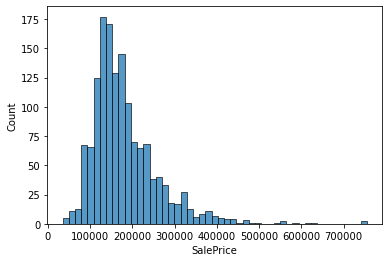

In [15]:
sns.histplot(df_train['SalePrice'])

>Skewness
> * In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.
> * If v>0, then the distribution has a heavier right tail (values above the mean)
> * If v<0, then the distribution has a heavier left tail (values below the mean)
> * If v=0, then the distribution is approximately symmetrical (at the third power of the deviation from the mean).

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())

Skewness: 1.882876


> Kurtosis
> * In probability theory and statistics, kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population. Different measures of kurtosis may have different interpretations.

In [19]:
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Kurtosis: 6.536282


**Relation of SalePrice with numerical variables**

In [20]:
def SalePriceRelationship(var):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

ValueError: could not convert string to float: 'Grvl'

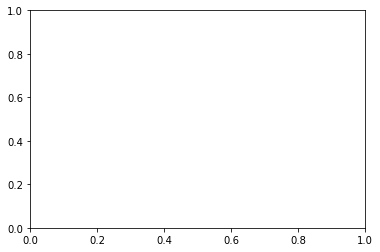

In [35]:
#scatter plot grlivarea/saleprice
var = 'Alley'
SalePriceRelationship(var)

In [36]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

#### References
Link: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#Last-but-not-the-least,-dummy-variables